# Homework #4: MNIST Fashion Classification

**Student Names:** Taminul Islam (856569517)

---

## Import Required Libraries

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

2025-11-07 23:52:38.696598: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-07 23:52:38.707260: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762581158.721705  633370 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762581158.725655  633370 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1762581158.736103  633370 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

TensorFlow version: 2.19.1
Keras version: 3.12.0


## Task 1: Implement a Baseline Model

In this task, we implement a basic neural network model for classifying Fashion MNIST images. The dataset contains 70,000 grayscale images in 10 categories, with each image being 28x28 pixels.

### Loading Dataset

In [ ]:
# Load the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Training images shape: {train_images.shape}")
print(f"Training labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")
print(f"Number of classes: {len(class_names)}")
print(f"Class names: {class_names}")

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Number of classes: 10
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


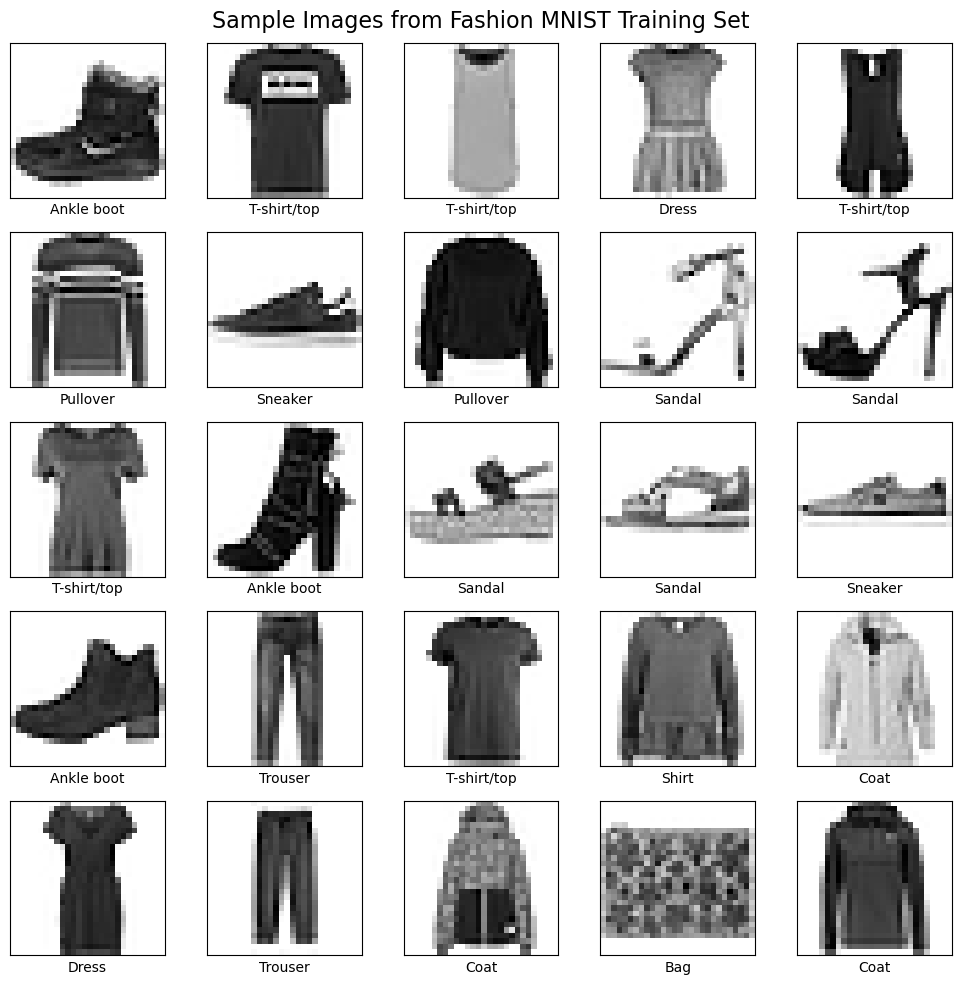

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.suptitle('Sample Images from Fashion MNIST Training Set', fontsize=16)
plt.tight_layout()
plt.show()

### Preprocess the Data

In [4]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

print(f"After normalization:")
print(f"Min pixel value: {train_images.min()}")
print(f"Max pixel value: {train_images.max()}")

After normalization:
Min pixel value: 0.0
Max pixel value: 1.0


### Build the Model

We create a sequential model with:
- Flatten layer: Converts 28x28 2D image array into a 784-element 1D array
- Dense layer (128 neurons): First hidden layer with ReLU activation
- Dense layer (10 neurons): Output layer with softmax activation for 10 classes

In [5]:
# Build the neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Display model architecture
model.summary()

/home/siu856569517/.conda/envs/cs535_hw4/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1762581271.953280  633370 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46430 MB memory:  -> device: 0, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:ac:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### Compile the Model

We configure the model with Adam Optimizer, Loss function, and Metrics (Accuracy)

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the Model

We train the model for 10 epochs on the training data.

In [7]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels),
                    verbose=1)

Epoch 1/10


I0000 00:00:1762581290.362371  633842 service.cc:152] XLA service 0x7fbb68004eb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1762581290.362401  633842 service.cc:160]   StreamExecutor device (0): NVIDIA RTX 6000 Ada Generation, Compute Capability 8.9
2025-11-07 23:54:50.377558: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1762581290.438898  633842 cuda_dnn.cc:529] Loaded cuDNN version 90101
2025-11-07 23:54:50.893493: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_96', 4 bytes spill stores, 4 bytes spill loads



 146/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6167 - loss: 1.1155

I0000 00:00:1762581291.557612  633842 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8267 - loss: 0.4954 - val_accuracy: 0.8173 - val_loss: 0.4785
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8662 - loss: 0.3740 - val_accuracy: 0.8461 - val_loss: 0.4363
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8770 - loss: 0.3344 - val_accuracy: 0.8707 - val_loss: 0.3544
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8851 - loss: 0.3135 - val_accuracy: 0.8569 - val_loss: 0.3921
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8904 - loss: 0.2953 - val_accuracy: 0.8704 - val_loss: 0.3503
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8957 - loss: 0.2819 - val_accuracy: 0.8783 - val_loss: 0.3425
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9010 - loss: 0.2695 - val_accuracy: 0.8809 - val_loss: 0.3348
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9033 - loss: 0.2586 - val_accurac

### Evaluate the Model

In [8]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 - 0s - 1ms/step - accuracy: 0.8842 - loss: 0.3295

Test accuracy: 0.8842
Test loss: 0.3295


### Predictions

In [9]:
# Make predictions on the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print(f"Predictions shape: {predictions.shape}")
print(f"Predicted labels shape: {predicted_labels.shape}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predictions shape: (10000, 10)
Predicted labels shape: (10000,)


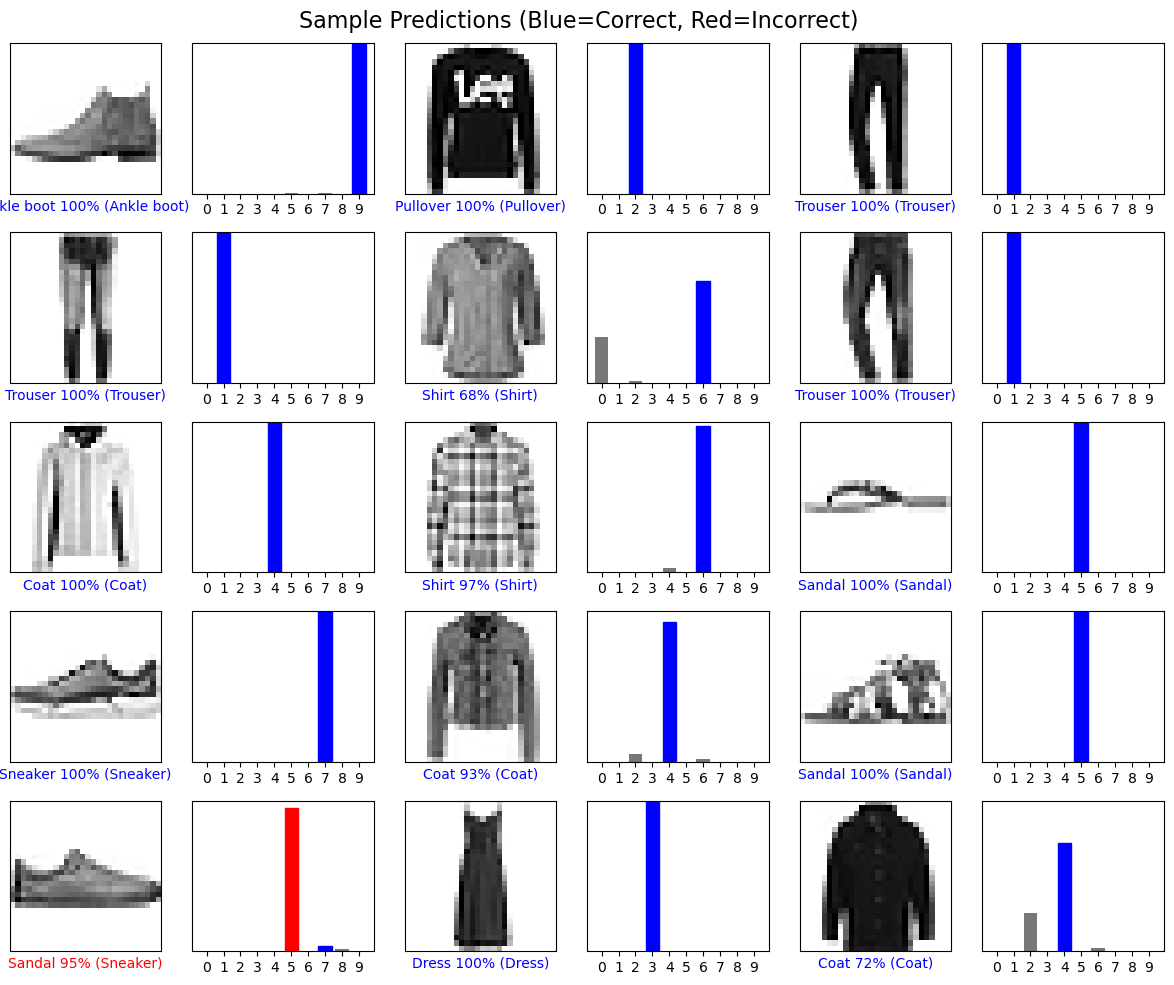

In [10]:
# Function to plot image with prediction
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):.0f}% ({class_names[true_label]})",
               color=color)

# Function to plot prediction confidence
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

# Plot the first 15 test images with predictions
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.suptitle('Sample Predictions (Blue=Correct, Red=Incorrect)', fontsize=16)
plt.tight_layout()
plt.show()

---

## Task 2: Analyzing Classification Errors through a Confusion Matrix

### Construct Confusion Matrix

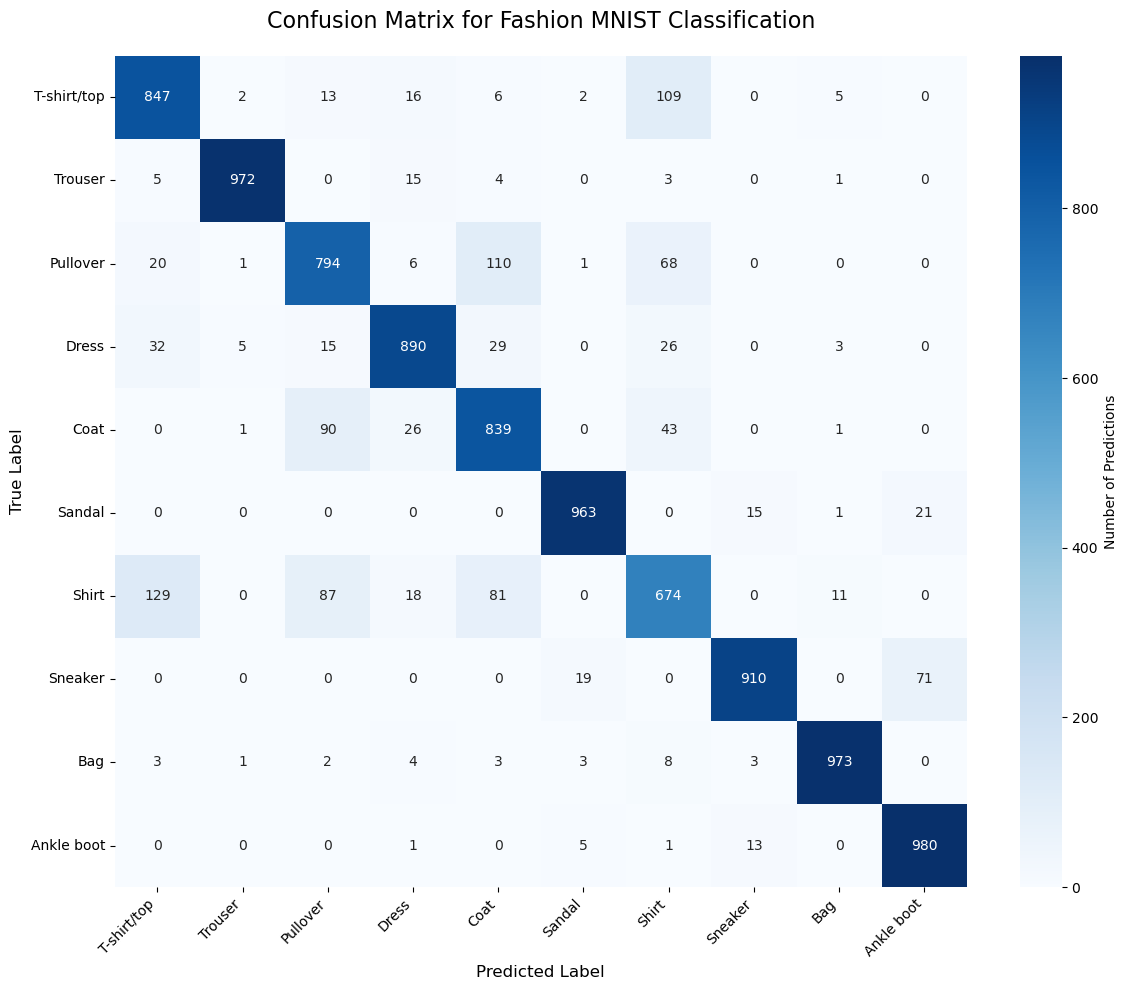

Confusion Matrix (rows=true labels, columns=predicted labels):
[[847   2  13  16   6   2 109   0   5   0]
 [  5 972   0  15   4   0   3   0   1   0]
 [ 20   1 794   6 110   1  68   0   0   0]
 [ 32   5  15 890  29   0  26   0   3   0]
 [  0   1  90  26 839   0  43   0   1   0]
 [  0   0   0   0   0 963   0  15   1  21]
 [129   0  87  18  81   0 674   0  11   0]
 [  0   0   0   0   0  19   0 910   0  71]
 [  3   1   2   4   3   3   8   3 973   0]
 [  0   0   0   1   0   5   1  13   0 980]]


In [ ]:
cm = confusion_matrix(test_labels, predicted_labels)

# Display confusion matrix with class names
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Number of Predictions'})
plt.title('Confusion Matrix for Fashion MNIST Classification', fontsize=16, pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("Confusion Matrix (rows=true labels, columns=predicted labels):")
print(cm)

### Interpretation of Confusion Matrix: Analyze Most Common Misclassifications

In [12]:
# Calculate per-class accuracy
class_accuracy = cm.diagonal() / cm.sum(axis=1)

print("Per-Class Accuracy:")
print("="*50)
for i, (name, acc) in enumerate(zip(class_names, class_accuracy)):
    print(f"{name:15s}: {acc:.4f} ({acc*100:.2f}%)")

# Find most common confusions (excluding diagonal)
print("\nMost Common Misclassifications:")
print("="*50)
cm_no_diag = cm.copy()
np.fill_diagonal(cm_no_diag, 0)

# Get top 10 confusion pairs
confusion_pairs = []
for i in range(len(class_names)):
    for j in range(len(class_names)):
        if i != j and cm_no_diag[i, j] > 0:
            confusion_pairs.append((cm_no_diag[i, j], i, j))

confusion_pairs.sort(reverse=True)
for count, true_idx, pred_idx in confusion_pairs[:10]:
    print(f"{class_names[true_idx]:15s} misclassified as {class_names[pred_idx]:15s}: {count} times")

Per-Class Accuracy:
T-shirt/top    : 0.8470 (84.70%)
Trouser        : 0.9720 (97.20%)
Pullover       : 0.7940 (79.40%)
Dress          : 0.8900 (89.00%)
Coat           : 0.8390 (83.90%)
Sandal         : 0.9630 (96.30%)
Shirt          : 0.6740 (67.40%)
Sneaker        : 0.9100 (91.00%)
Bag            : 0.9730 (97.30%)
Ankle boot     : 0.9800 (98.00%)

Most Common Misclassifications:
Shirt           misclassified as T-shirt/top    : 129 times
Pullover        misclassified as Coat           : 110 times
T-shirt/top     misclassified as Shirt          : 109 times
Coat            misclassified as Pullover       : 90 times
Shirt           misclassified as Pullover       : 87 times
Shirt           misclassified as Coat           : 81 times
Sneaker         misclassified as Ankle boot     : 71 times
Pullover        misclassified as Shirt          : 68 times
Coat            misclassified as Shirt          : 43 times
Dress           misclassified as T-shirt/top    : 32 times


**Analysis of Misclassifications:**

Based on the confusion matrix, we can observe several interesting patterns:

1. **Shirt vs T-shirt/top vs Pullover Confusion:** These three categories are frequently confused with each other because they share similar visual characteristics - they are all upper-body garments with similar shapes. The main differences lie in subtle details like collar types, sleeve lengths, and fabric patterns, which can be challenging for the model to distinguish in low-resolution 28x28 images.

2. **Coat vs Pullover/Shirt Confusion:** Coats are sometimes misclassified as pullovers or shirts because they share similar silhouettes. The distinction often depends on length and thickness, which may not be clearly visible in grayscale images.

3. **Sneaker vs Ankle boot Confusion:** These two footwear categories are the most commonly confused pair because they have very similar shapes. The primary difference is the height of the shoe, which can be difficult to discern in some images.

4. **High Accuracy Categories:** Categories like 'Trouser' and 'Bag' typically achieve higher accuracy because they have distinctive shapes that are easily distinguishable from other categories. Trousers have a characteristic two-legged shape, while bags have unique structural features.

**Why Percentage Accuracy Can Be Misleading:**

- **Class Imbalance:** If the dataset had imbalanced classes (though Fashion MNIST is balanced), overall accuracy could be high while performance on minority classes is poor.
- **Different Error Costs:** In real-world applications, some misclassifications might be more costly than others. For example, confusing a shirt with a t-shirt might be acceptable, but confusing a sandal with a bag would be more problematic.
- **Aggregate Metric:** Overall accuracy masks per-class performance differences. A model might achieve 85% overall accuracy but only 60% on certain challenging classes.
- **Semantic Similarity:** Some confusions make more semantic sense (shirt/t-shirt) than others (sandal/bag), but overall accuracy treats all errors equally.

---

## Task 3: Observing the Model's Learning Curve Over Time

By plotting the training and validation accuracy over epochs, we can understand how the model learns over time and detect potential overfitting.

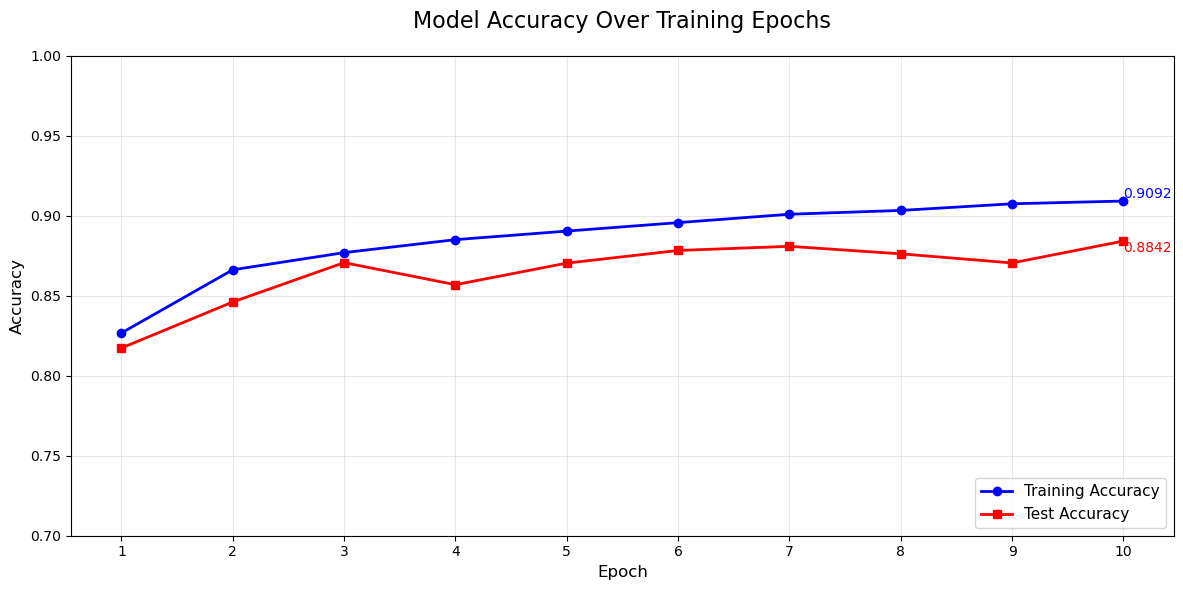

Training Summary:
Final Training Accuracy: 0.9092
Final Test Accuracy: 0.8842
Best Test Accuracy: 0.8842 (Epoch 10)
Overfitting Gap: 0.0250


In [13]:
# Plot learning curves over epochs
plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
epochs_range = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs_range, history.history['accuracy'], 'b-', linewidth=2, label='Training Accuracy', marker='o')
plt.plot(epochs_range, history.history['val_accuracy'], 'r-', linewidth=2, label='Test Accuracy', marker='s')

plt.title('Model Accuracy Over Training Epochs', fontsize=16, pad=20)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(epochs_range)
plt.ylim([0.7, 1.0])

# Add annotations for final values
final_train_acc = history.history['accuracy'][-1]
final_test_acc = history.history['val_accuracy'][-1]
plt.text(len(epochs_range), final_train_acc, f'{final_train_acc:.4f}', 
         ha='left', va='bottom', fontsize=10, color='blue')
plt.text(len(epochs_range), final_test_acc, f'{final_test_acc:.4f}', 
         ha='left', va='top', fontsize=10, color='red')

plt.tight_layout()
plt.show()

# Print summary statistics
print("Training Summary:")
print("="*50)
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Test Accuracy: {final_test_acc:.4f}")
print(f"Best Test Accuracy: {max(history.history['val_accuracy']):.4f} (Epoch {np.argmax(history.history['val_accuracy']) + 1})")
print(f"Overfitting Gap: {final_train_acc - final_test_acc:.4f}")

---

## Task 4: Examining the Learning Curve over Data Volume

This experiment helps us understand whether adding more training data would improve model performance. We train multiple models with different amounts of training data (from 5,000 to 60,000 samples) and observe the effect on accuracy.

### Train Models with Varying Data Sizes

In [14]:
# Reload original data to ensure we start fresh
fashion_mnist = keras.datasets.fashion_mnist
(train_images_full, train_labels_full), (test_images_full, test_labels_full) = fashion_mnist.load_data()

# Normalize
train_images_full = train_images_full / 255.0
test_images_full = test_images_full / 255.0

# Define data sizes to experiment with
data_sizes = list(range(5000, 65000, 5000))
train_accuracies = []
test_accuracies = []

print("Training models with different data sizes...")
print("="*70)

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

for size in data_sizes:
    print(f"\nTraining with {size:,} samples...")
    
    # Randomly sample training data
    indices = np.random.choice(len(train_images_full), size, replace=False)
    train_images_subset = train_images_full[indices]
    train_labels_subset = train_labels_full[indices]
    
    # Build new model (same architecture as before)
    model_subset = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    
    # Compile model
    model_subset.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])
    
    # Train for 6 epochs (as specified)
    history_subset = model_subset.fit(train_images_subset, train_labels_subset, 
                                      epochs=6, 
                                      validation_data=(test_images_full, test_labels_full),
                                      verbose=0)
    
    # Get final training and test accuracy
    final_train_acc = history_subset.history['accuracy'][-1]
    final_test_acc = history_subset.history['val_accuracy'][-1]
    
    train_accuracies.append(final_train_acc)
    test_accuracies.append(final_test_acc)
    
    print(f"  Training Accuracy: {final_train_acc:.4f}")
    print(f"  Test Accuracy: {final_test_acc:.4f}")

print("\n" + "="*70)
print("Training complete!")

Training models with different data sizes...

Training with 5,000 samples...


/home/siu856569517/.conda/envs/cs535_hw4/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  Training Accuracy: 0.8646
  Test Accuracy: 0.8326

Training with 10,000 samples...
  Training Accuracy: 0.8732
  Test Accuracy: 0.8387

Training with 15,000 samples...


2025-11-07 23:56:39.112731: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_102', 4 bytes spill stores, 4 bytes spill loads



  Training Accuracy: 0.8844
  Test Accuracy: 0.8470

Training with 20,000 samples...
  Training Accuracy: 0.8834
  Test Accuracy: 0.8567

Training with 25,000 samples...
  Training Accuracy: 0.8880
  Test Accuracy: 0.8352

Training with 30,000 samples...
  Training Accuracy: 0.8897
  Test Accuracy: 0.8583

Training with 35,000 samples...
  Training Accuracy: 0.8931
  Test Accuracy: 0.8568

Training with 40,000 samples...
  Training Accuracy: 0.8945
  Test Accuracy: 0.8570

Training with 45,000 samples...
  Training Accuracy: 0.8950
  Test Accuracy: 0.8431

Training with 50,000 samples...
  Training Accuracy: 0.8965
  Test Accuracy: 0.8650

Training with 55,000 samples...
  Training Accuracy: 0.8989
  Test Accuracy: 0.8733

Training with 60,000 samples...
  Training Accuracy: 0.8979
  Test Accuracy: 0.8760

Training complete!


### Plot Learning Curve Over Data Volume

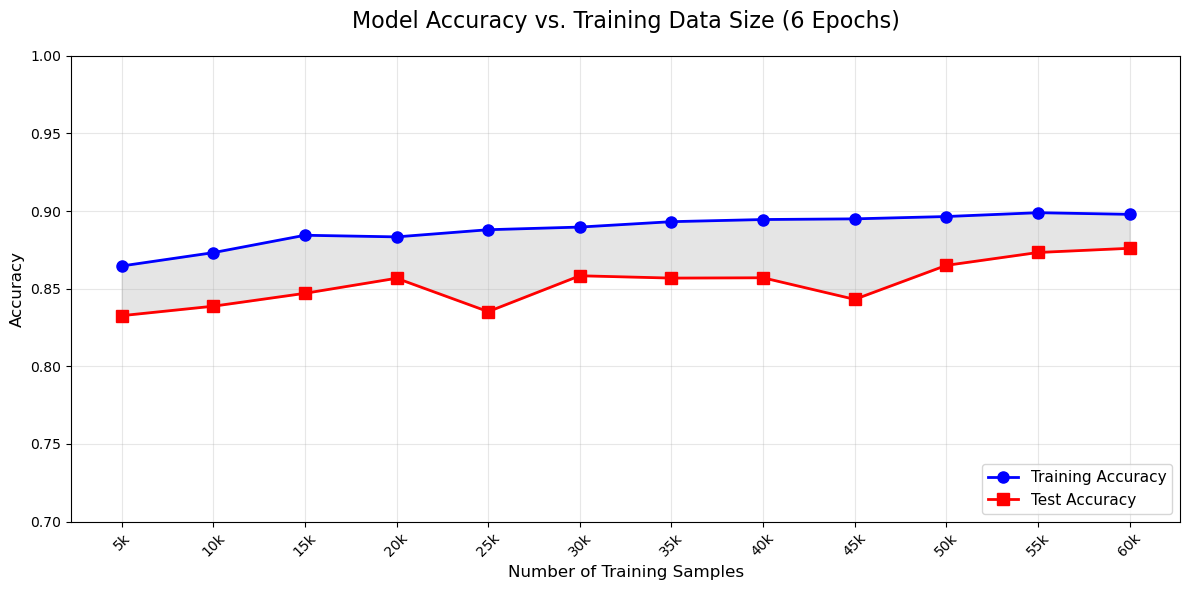

Data Volume Analysis:

Accuracy with 5,000 samples:  Train=0.8646, Test=0.8326
Accuracy with 60,000 samples: Train=0.8979, Test=0.8760

Improvement in test accuracy: 0.0434 (4.34%)

Average accuracy gain per 5k samples (first half): 0.0040
Average accuracy gain per 5k samples (second half): 0.0038


In [15]:
# Plot learning curve over data volume
plt.figure(figsize=(12, 6))

plt.plot(data_sizes, train_accuracies, 'b-', linewidth=2, label='Training Accuracy', marker='o', markersize=8)
plt.plot(data_sizes, test_accuracies, 'r-', linewidth=2, label='Test Accuracy', marker='s', markersize=8)

plt.title('Model Accuracy vs. Training Data Size (6 Epochs)', fontsize=16, pad=20)
plt.xlabel('Number of Training Samples', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(data_sizes, [f'{x//1000}k' for x in data_sizes], rotation=45)
plt.ylim([0.7, 1.0])

# Add shaded region between curves to show overfitting gap
plt.fill_between(data_sizes, train_accuracies, test_accuracies, alpha=0.2, color='gray', label='Overfitting Gap')

plt.tight_layout()
plt.show()

# Print analysis
print("Data Volume Analysis:")
print("="*70)
print(f"\nAccuracy with 5,000 samples:  Train={train_accuracies[0]:.4f}, Test={test_accuracies[0]:.4f}")
print(f"Accuracy with 60,000 samples: Train={train_accuracies[-1]:.4f}, Test={test_accuracies[-1]:.4f}")
print(f"\nImprovement in test accuracy: {test_accuracies[-1] - test_accuracies[0]:.4f} ({(test_accuracies[-1] - test_accuracies[0])*100:.2f}%)")

# Calculate diminishing returns
accuracy_gains = np.diff(test_accuracies)
print(f"\nAverage accuracy gain per 5k samples (first half): {np.mean(accuracy_gains[:6]):.4f}")
print(f"Average accuracy gain per 5k samples (second half): {np.mean(accuracy_gains[6:]):.4f}")

### Detailed Data Volume Statistics

In [16]:
# Create a detailed table of results
import pandas as pd

results_df = pd.DataFrame({
    'Training Samples': data_sizes,
    'Training Accuracy': [f'{acc:.4f}' for acc in train_accuracies],
    'Test Accuracy': [f'{acc:.4f}' for acc in test_accuracies],
    'Overfitting Gap': [f'{train_accuracies[i] - test_accuracies[i]:.4f}' for i in range(len(data_sizes))]
})

print("\nDetailed Results Table:")
print("="*70)
print(results_df.to_string(index=False))


Detailed Results Table:
 Training Samples Training Accuracy Test Accuracy Overfitting Gap
             5000            0.8646        0.8326          0.0320
            10000            0.8732        0.8387          0.0345
            15000            0.8844        0.8470          0.0374
            20000            0.8834        0.8567          0.0267
            25000            0.8880        0.8352          0.0528
            30000            0.8897        0.8583          0.0314
            35000            0.8931        0.8568          0.0363
            40000            0.8945        0.8570          0.0375
            45000            0.8950        0.8431          0.0519
            50000            0.8965        0.8650          0.0315
            55000            0.8989        0.8733          0.0256
            60000            0.8979        0.8760          0.0219


### THANK YOU!
